In [7]:
import networkx as nx
import numpy as np
import pickle
import math



In [8]:
adj_matrix = np.load("input/feasible_problem/adj_matrix.npy")

In [9]:
filehandler = open("input/feasible_problem/net.pkl", 'rb')
net = pickle.load(filehandler)

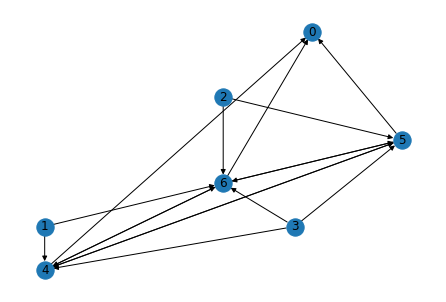

In [10]:
print(net)
pos = {0: net.gateway[0]["coordinates"]}
for i in net.device.keys():
    pos.update({i: net.device[i]["coordinates"]})
for j in net.station.keys():
    pos.update({j: net.station[j]["coordinates"]})

nx.draw(net.graph, pos, with_labels=True)

In [11]:
device_capacity = net.device[1]["intensity"]
lp_graph = nx.DiGraph()
lp_graph.add_node(0, demand=len(net.device.keys()))
for i in net.device.keys():
    for j in net.station.keys():
        if net.adj_matrix[i, j] == 1:
            print(f"Device {i} connect with Sta {j}")
            lp_graph.add_node(i, demand=-1)
            lp_graph.add_edges_from(
                [(i, j)],
                intensity=net.device[i]["intensity"]/device_capacity)

for i in net.station.keys():
    for j in net.station.keys():
        if net.adj_matrix[i, j] == 1:
            print(f"\t Sta {i} connect with Sta {j}")
            lp_graph.add_edges_from(
                [(i, j)],
                intensity=int(net.station[i]["intensity"]/device_capacity))
    for j in net.gateway.keys():
        if net.adj_matrix[i, j] == 1:
            print(f"\t Sta {i} connect with Gateway {j}")
            lp_graph.add_edges_from(
                [(i, j)],
                intensity=(net.station[i]["intensity"]/device_capacity))

lp_graph_flowCost, lp_graph_flowDict = nx.network_simplex(lp_graph,
                                                          capacity="intensity")

Device 1 connect with Sta 4
Device 1 connect with Sta 6
Device 2 connect with Sta 5
Device 2 connect with Sta 6
Device 3 connect with Sta 4
Device 3 connect with Sta 5
Device 3 connect with Sta 6
	 Sta 4 connect with Sta 5
	 Sta 4 connect with Sta 6
	 Sta 4 connect with Gateway 0
	 Sta 5 connect with Sta 4
	 Sta 5 connect with Sta 6
	 Sta 5 connect with Gateway 0
	 Sta 6 connect with Sta 4
	 Sta 6 connect with Sta 5
	 Sta 6 connect with Gateway 0


1 -- 4
4 -- 0
2 -- 5
5 -- 4
3 -- 4


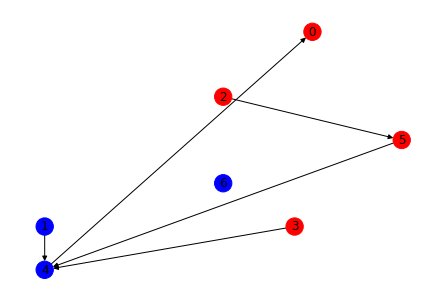

In [12]:
solution_graph = nx.DiGraph()
for i in lp_graph_flowDict.keys():
    solution_graph.add_node(i)

for i in lp_graph_flowDict.keys():
    for j in lp_graph_flowDict[i].keys():
        if lp_graph_flowDict[i][j] != 0:
            print(f"{i} -- {j}")
            solution_graph.add_edges_from([(i,j)])

nodes = list(lp_graph.nodes)
device_nodes = list(net.device.keys())

color = ['b' if i in device_nodes
         else 'r' for i in lp_graph.nodes]
color = []
nodes.sort()
for i in nodes:
    if i in device_nodes:
        color.append("b")
    else:
        color.append("r")

nx.draw(solution_graph, pos, with_labels=True, node_color=color)
# ['r', 'b', 'r', 'b', 'r', 'r', 'b', 'b', 'b']

# Example from NetworkX tutorial

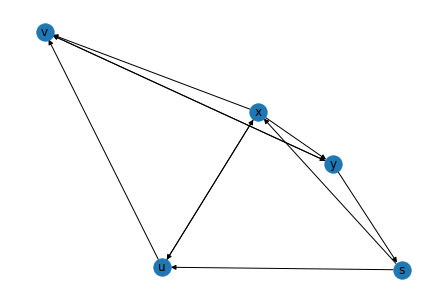

In [13]:
G=nx.DiGraph()
G.add_weighted_edges_from([('s','u',10), ('s','x',5),
                            ('u','v',1), ('u','x',2),
                            ('v','y',1), ('x','u',3),
                            ('x','v',5), ('x','y',2),
                            ('y','s',7), ('y','v',6)])
G.add_node('s', demand = -1)
G.add_node('x', demand = -1)
G.add_node('v', demand = 2)
nx.draw(G, with_labels=True)
# nx.draw_networkx_labels(G)

flowCost, flowDict = nx.network_simplex(G)
# flowCost == nx.shortest_path_length(G, 's', 'v', weight = 'weight')
#
# sorted([(u, v) for u in flowDict for v in flowDict[u] if flowDict[u][v] > 0])
#
# nx.shortest_path(G, 's', 'v', weight = 'weight')